multiclass(0, 1, 2..9 categories) classification problem, using ANN and MNIST dataset(collection of 70k images, every image has one handwritten digit), these images have low resolution(28*28 = 784pixcels)

### we will make an ANN and do predictions.

input will be 784, one input for each pixcel..
hidden layer will contain nodes equal to 128..
output nodes will be equal to the number of classes(10). And the one with higher probability will be our output..

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
#keras already has this built in dataset
# load_data() provides us data in the form of (x_train, y_train),(x_test,y_test)

In [ ]:
x_train.shape
#3D array, with 60k images and each image is (28, 28) ka numpy array.

(60000, 28, 28)

In [ ]:
x_train
# here the data is images. Data is in the form of pixcel value, not exactly in form of images.

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# first image
x_train[0]
# data shows pixcels in each row.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train
# this is a label as in the digits of each and every 70k images.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

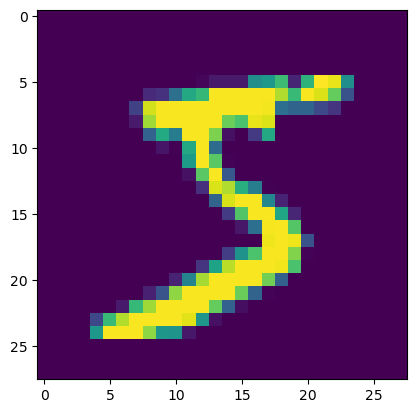

In [ ]:
# this pixcel value can be converted to image
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

#### now we create a neural network architechture such that we can pass this dataset, and it will train the model to understand which pixcel value signifies which digit.


In [ ]:
# first we need to bring the value of array between 0 and 1, because when we train neural network if the values remain in similar range then it will help fast convergence and weights will be easy to found.
# this can be done by dividing every number with the maximum (which is 255 here)
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#creating an object for the sequential model.
model = Sequential()

# now before adding the layers, we have a problem to be solved first..
# we have data in the form of (28*28)(rows and columns), this need to be flatten and bring all the data in a single row(1*784)
# flatten converts higher dimensional array into 1D
model.add(Flatten(input_shape=(28,28)))
# here we need to specify input_shape which in our case is (28,28)

D:\anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#adding layers (hidden, output)

model.add(Dense(128, activation='relu'))
# adding a dense hidden layer where our activation fuction is relu, with 128 nodes and input not required to specify as it takes input from flatten.

model.add(Dense(10, activation='softmax'))
#adding a output layer, whenever we have more that 1 node in output we need to use softmax for classification

In [ ]:
model.summary()
# the parameter specifoes the number of weights and biases

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
# using sparse, we dont have to use one hot encoding, whereas only categorical_crossentropy requires one hot encoding

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split = 0.2)
# here we can see that our loss keeps decresing

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8644 - loss: 0.4824 - val_accuracy: 0.9539 - val_loss: 0.1566
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9611 - loss: 0.1364 - val_accuracy: 0.9644 - val_loss: 0.1205
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9742 - loss: 0.0892 - val_accuracy: 0.9673 - val_loss: 0.1079
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9815 - loss: 0.0666 - val_accuracy: 0.9709 - val_loss: 0.0968
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9848 - loss: 0.0511 - val_accuracy: 0.9717 - val_loss: 0.0947
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9893 - loss: 0.0371 - val_accuracy: 0.9737 - val_loss: 0.0901
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0306 - val_accuracy: 0.9745 - val_loss: 0.0893
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9934 - loss: 0.0227 - 

In [ ]:
y_prob = model.predict(x_test)
# this will give a probabilty of images being (0,1,2,3..9)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step


In [ ]:
y_prob

array([[6.4685546e-10, 8.8310997e-10, 1.0055095e-07, ..., 9.9999142e-01,
        3.3878680e-07, 6.8438516e-07],
       [1.1250608e-13, 8.5627390e-09, 1.0000000e+00, ..., 3.7674947e-19,
        2.1359352e-09, 1.2357888e-20],
       [2.9998247e-08, 9.9929595e-01, 3.3440854e-05, ..., 5.4792908e-04,
        1.1777368e-04, 3.5368177e-07],
       ...,
       [1.9896572e-16, 1.6582226e-15, 6.3193322e-16, ..., 9.4658567e-08,
        5.6971068e-09, 2.4482665e-06],
       [2.7771966e-16, 5.1449676e-16, 2.9382302e-17, ..., 5.7236001e-16,
        2.7819356e-09, 1.5533686e-15],
       [1.8060772e-09, 1.9069150e-19, 9.1542236e-13, ..., 9.8069976e-23,
        2.4041385e-11, 1.8317894e-15]], dtype=float32)

In [ ]:
# but we need to show if the image is (0,1,2,3..9)
# this can be found by checking the maximum value in the above array, in a index
number = y_prob.argmax(axis=1)
#y_prediction

In [ ]:
number[0]

7

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, number)

0.9771

In [ ]:
# we can definitely try ways to increase the accuracy by avoiding overfitting

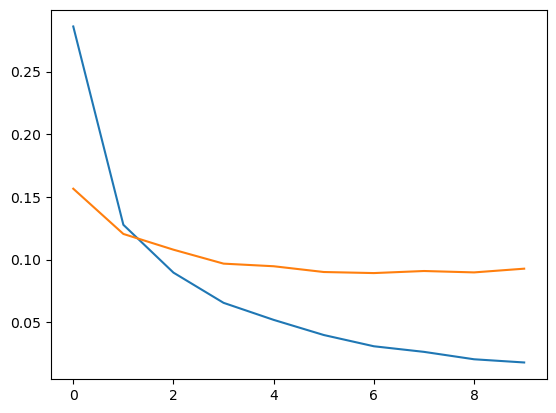

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# gap b/w them tells us about the overfitting